

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be analyzing data asscoiated to TMDb movie, and explore how the movie's runtime changes over years and related to popularity.



Research questions: <p>1. How does the movie's runtime changes over years?</p>
                    <p>2.What is the relation between the movie's runtime and popularity?</p>
                   
           



In [217]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

load the data, check for cleanliness,
### General Properties

In [218]:
# Load the data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [219]:
#count number of rows and columns
df.shape 

(10866, 21)

In [220]:
#concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning 
<ol>
     <li>drop unused data
     <li>drop deplicates
     <li>drop nulls
     
</ol>

In [221]:
#drop unused columns
df.drop(['homepage','overview','tagline','keywords','genres'],axis = 1, inplace = True)
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [222]:
# a function to drop duplicated items and null items. Those items are unrelated to research questions.
def drop(data):
    if (df.duplicated().sum() > 0 ):
        df.drop_duplicates(inplace= True)
    if(df.isnull().any().sum() > 0):
        df.dropna(inplace = True)
drop(df)        


In [223]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [224]:
#check  if any duplicated items
df.duplicated().sum()

0

In [225]:
#check if any null items
df.isnull().any()

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
runtime                 False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [226]:
df.revenue

0        1513528810
1         378436354
2         295238201
3        2068178225
4        1506249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865             0
Name: revenue, Length: 9777, dtype: int64

In [227]:
# fill zero values with nan
df.revenue.replace(0,np.nan,inplace = True)

In [228]:
df.revenue_adj.replace(0,np.nan,inplace = True)

In [274]:
df.runtime.replace(0,np.nan,inplace = True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9777 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9777 non-null   int64  
 1   imdb_id               9777 non-null   object 
 2   popularity            9777 non-null   float64
 3   budget                9777 non-null   int64  
 4   revenue               4750 non-null   float64
 5   original_title        9777 non-null   object 
 6   cast                  9777 non-null   object 
 7   director              9777 non-null   object 
 8   runtime               9777 non-null   int64  
 9   production_companies  9777 non-null   object 
 10  release_date          9777 non-null   object 
 11  vote_count            9777 non-null   int64  
 12  vote_average          9777 non-null   float64
 13  release_year          9777 non-null   int64  
 14  budget_adj            9777 non-null   float64
 15  revenue_adj         

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 How the movie's runtime changes over year?

There are two varibles involved: <strong>release_year</strong> and the other is <strong>runtime.</strong>  
I use the groupby() to group data by release_year and calculate the mean() of runtime for each year.


In [230]:
# Average the runtime in each year
df_year = df.groupby('release_year')['runtime'].mean()
print(df_year)

release_year
1960    110.656250
1961    119.866667
1962    125.833333
1963    111.323529
1964    111.195122
1965    119.294118
1966    108.590909
1967    109.416667
1968    110.540541
1969    110.310345
1970    112.048780
1971    107.727273
1972    103.027027
1973    103.527273
1974    108.659091
1975    107.714286
1976    109.956522
1977    108.327273
1978    111.573770
1979    112.625000
1980    108.424658
1981    105.064103
1982    104.037500
1983    104.389610
1984    104.868687
1985    109.433962
1986    102.165138
1987    102.318584
1988    104.037879
1989    106.240310
1990    105.880952
1991    105.768000
1992    108.182540
1993    107.744186
1994    107.850575
1995    108.335294
1996    106.336735
1997    107.594444
1998    104.774869
1999    107.650943
2000    104.649746
2001    108.990566
2002    106.518672
2003    100.818898
2004    103.632411
2005    104.470588
2006    101.937143
2007    101.028278
2008    100.430839
2009     99.038055
2010     99.695238
2011     98.442982

Text(0, 0.5, 'runtime')

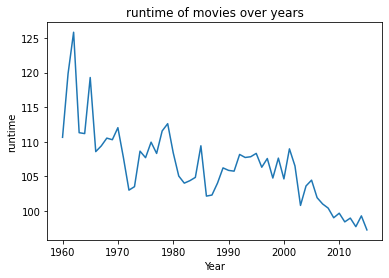

In [231]:
# Visualization: Creat a line chart to see how runtime changes over years
df_year.plot(kind = 'line')
plt.title('runtime of movies over years')
plt.xlabel('Year')
plt.ylabel('runtime')


## conclusion
As can be seen from the line chart, runtime decreased over years.  


### Research Question 2  How runtime related to the  popularity?

There are two varibles: <strong>runtime</strong> and <strong> popularity</strong>

<p>I used the filter() to create a table only contains runtime and popularity</p>
<p>I use scatter graph to visualized the relationship between runtime and popularity in two parts: 

<p>First part: runtime: (0,130) and popularity :(0,17)</p>
<p>Second Part: runtime :(130,400) and popularity:(0,17)</p>




In [232]:
#create a new table to see runtime and popularity
df_new = df.filter(['runtime','popularity'], axis=1)
df_new.head(10)

,runtime,popularity
0,124,32.985763
1,120,28.419936
2,119,13.112507
3,136,11.173104
4,137,9.335014
5,156,9.110700
6,125,8.654359
7,141,7.667400
8,91,7.404165
9,94,6.326804


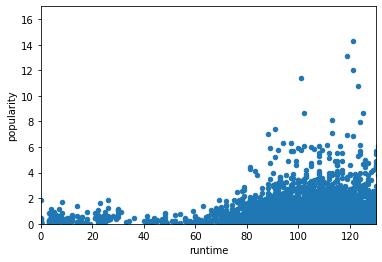

In [233]:
# Use scatter graph to see how runtime related to popularity, and I pick runtime range from 0 to 130
df_new.plot(x = 'runtime',y = 'popularity',kind = 'scatter', xlim = (0, 130), ylim = (0, 17))

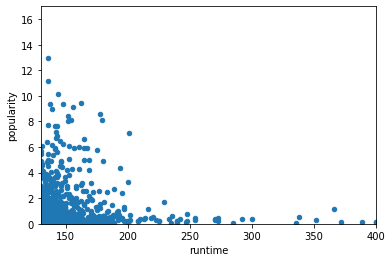

In [234]:
# Second part : runtime range from 130 to 400
df_new.plot(x = 'runtime',y = 'popularity',kind = 'scatter', xlim = (130, 400), ylim = (0, 17))

<a id='conclusions'></a>
## Conclusions
<p> When runtime is in range 0-130, we find that the runtime postive related to the popularity. As the movie's runtime increased, it becomes more popular.</p>

<p>When runtime is in range 130-400, we find that the runtime is negatively related to the popularity. As the movie's runtime increased, it become less popular.</p>
    

## Research Question 3
### How are revenues trending over time?

In [235]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [236]:
df_year_rev = df.groupby('release_year')['revenue_adj'].mean()

Text(0, 0.5, 'revenues')

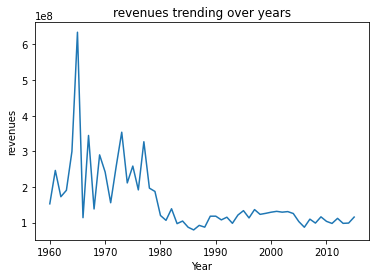

In [237]:
df_year_rev.plot(kind = 'line')
plt.title('revenues trending over years')
plt.xlabel('Year')
plt.ylabel('revenues')

## Conclusion
<p> The revenues show a fluctuated trend over time. There is a drastic drop between around 1966 to 1967. The float tends to be smalled after 1980, and there is a small drop from 2005 to 2010

## Research Question 4
### 4.	Do top ratings movies always generate big revenue?

In [238]:
df.vote_average

0        6.5
1        7.1
2        6.3
3        7.5
4        7.3
        ... 
10861    7.4
10862    5.7
10863    6.5
10864    5.4
10865    1.5
Name: vote_average, Length: 9777, dtype: float64

In [239]:
df.revenue_adj.dropna(inplace = True)

In [240]:
df.revenue_adj.min()

2.37070528956505

In [241]:
df.revenue_adj.max()

2827123750.41189

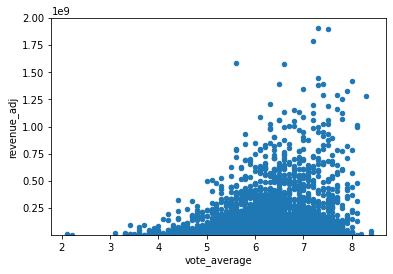

In [242]:
df.plot(x = 'vote_average',y = 'revenue_adj',kind = 'scatter',ylim = (2,2000000000))

let's take a close look at vote_average between 5 to 9

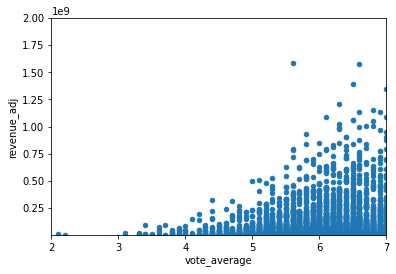

In [243]:
df.plot(x = 'vote_average',y = 'revenue_adj',kind = 'scatter', xlim = (2,7),ylim = (2,2000000000))

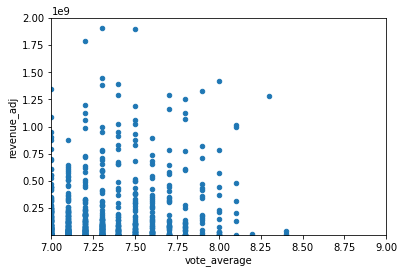

In [244]:
df.plot(x = 'vote_average',y = 'revenue_adj',kind = 'scatter', xlim = (7,9),ylim = (2,2000000000))

### Conclusion
<p> When Vote Average is between 2 to 6.5, higher rating is likely to produce higher revenue;
<p> When Vote Average is between 6.5 to 9, higher rating is likely to produce lower revenue
<p> Thus, top rating movies not always generate high revenue.

## Research Question 5
### Do higher budget movies always generate big revenue?

In [245]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


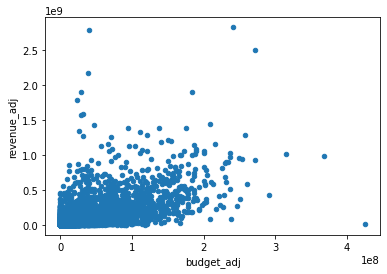

In [246]:
df.plot(x = 'budget_adj',y = 'revenue_adj',kind = 'scatter')

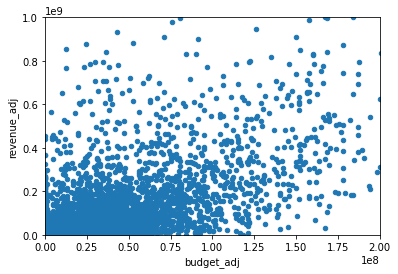

In [247]:
df.plot(x = 'budget_adj',y = 'revenue_adj',kind = 'scatter',xlim =(0,2e8),ylim =(0,1e9))

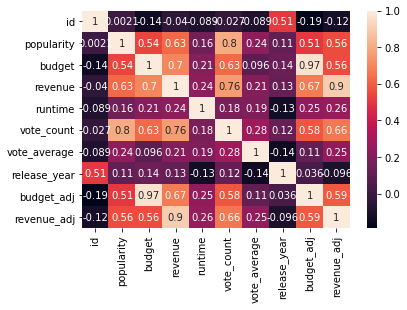

In [294]:
sns.heatmap(df.corr(), annot = True)

### Conclusion
<p> The most dense area is in left corner, with both less budget and revenue. The corrleation is about 0.59, so there is a moderate relationship between budget and revenue. With higher budget will have higher revenue.

## Research question 6
### 6.	Can we provide a list of the most popular directors based on ratings?


In [248]:
df_director_vote = df.groupby('director').mean().sort_values(by = 'vote_average',ascending=False)
df_director_vote['vote_average'].head(10)

director
David Mallet                            8.7
Curt Morgan                             8.5
Saul Swimmer                            8.5
Martin Scorsese|Michael Henry Wilson    8.5
Jorge RamÃ­rez SuÃ¡rez                  8.4
Dean Wellins                            8.3
Adam Curtis                             8.3
Sam Dunn|Scot McFadyen                  8.3
Claude Lanzmann                         8.3
Ã‡aÄŸan Irmak                           8.2
Name: vote_average, dtype: float64

## Research question 7
### 7.	Can we provide a list of directors that generates big revenue?

In [249]:
df_director_vote = df.groupby('director').mean().sort_values(by = 'revenue_adj',ascending=False)
df_director_vote['revenue_adj'].head(10)

director
Irwin Winkler                                        1.583050e+09
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1.574815e+09
Chris Buck|Jennifer Lee                              1.192711e+09
Roger Allers|Rob Minkoff                             1.159592e+09
Kyle Balda|Pierre Coffin                             1.064192e+09
Lee Unkrich                                          1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon            1.061904e+09
George Lucas                                         1.052320e+09
David Yates                                          1.044364e+09
Andrew Stanton|Lee Unkrich                           1.024887e+09
Name: revenue_adj, dtype: float64

## Research Question 8
### 8.	Is there a relation between popularity and revenue ?

In [275]:
df.popularity

0        32.985763
1        28.419936
2        13.112507
3        11.173104
4         9.335014
           ...    
10861     0.080598
10862     0.065543
10863     0.065141
10864     0.064317
10865     0.035919
Name: popularity, Length: 9777, dtype: float64

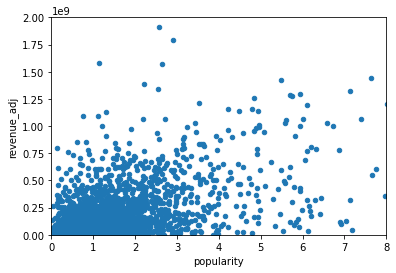

In [289]:
df.plot(x = 'popularity',y = 'revenue_adj',kind = 'scatter', xlim = (0,8),ylim =(0,2e9))

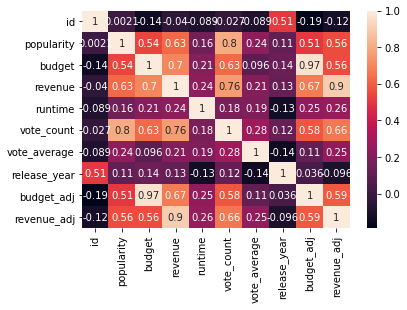

In [295]:
sns.heatmap(df.corr(), annot = True)

The correlation is about 0.56, so there is a relationship between revenue and popularity, it looks like higher popularity will have higher revenue.

## Final Conclusions
<p> Moderate positive relationship between revenue and popularity
<p> Moderate positive relationship between budget and revenue
<p> Top rating movies not always generate high revenue
<p> The revenues show a fluctuated trend over time. There is a drastic drop between around 1966 to 1967
<p> When runtime is in range 0-130, we find that the runtime postive related to the popularity.
<p> When runtime is in range 130-400, we find that the runtime is negatively related to the popularity.
<p> Runtime decreased over years.

## Limitation
   <p> If we need to explore more factors that affect popularity, the provided data is not enough and not updated.</p>
   <p> Missing values may affect the result if we want explore more.
   <p> There are some outliners in runtime, it may affect the result

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])